In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

To download the data, we will use `!wget` to download it from IBM Object Storage.

In [4]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

zsh:1: command not found: wget


### Load Data From CSV File  

In [54]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [6]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [12]:
p_A = 0.5
p_B = 0.5

1 - (p_A**2 + p_B**2)

0.5

In [6]:
import numpy as np

In [7]:
np.sum(-p_A*np.log(p_A) - p_B * np.log(p_B))

0.6931471805599453

In [14]:
p_A = 0.1
p_B = 0.9

1 - (p_A**2 + p_B**2)

0.17999999999999994

In [ ]:
Gini: 1 - np.sum(p**2)

In [15]:
p_A = 0
p_B = 1 - p_A

1 - (p_A**2 + p_B**2)

0

In [7]:
churn_df.churn.unique()

array([1, 0])

## Practice
How many rows and columns are in this dataset in total? What are the name of columns?

In [8]:
# write your code here
churn_df.shape

(200, 10)

Lets define X, and y for our dataset:

In [55]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [56]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat']].to_numpy()
X[0:5]

array([[1.10e+01, 3.30e+01, 7.00e+00, 1.36e+02, 5.00e+00, 5.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 4.40e+00, 2.08e+01, 0.00e+00,
        1.52e+01, 3.57e+01, 4.20e+01, 2.11e+02, 1.25e+02, 1.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.48e+00,
        3.03e+00, 4.91e+00, 4.00e+00],
       [3.30e+01, 3.30e+01, 1.20e+01, 3.30e+01, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 9.45e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.89e+02, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.25e+00,
        3.24e+00, 3.50e+00, 1.00e+00],
       [2.30e+01, 3.00e+01, 9.00e+00, 3.00e+01, 1.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 6.30e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.57e+02, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.84e+00,
        3.24e+00, 3.40e+00, 3.00e+00],
       [3.80e+01, 3.50e+01, 5.00e+00, 7.60e+01, 2.00e+00, 1.00e+01,

In [57]:
y = churn_df['churn'].values
y [0:5]

array([1., 1., 0., 0., 0.])

Also, we normalize the dataset:

In [58]:
preprocessing.MinMaxScaler().fit(X).transform(X)

array([[0.14, 0.25, 0.15, ..., 0.52, 0.52, 1.  ],
       [0.45, 0.25, 0.25, ..., 0.6 , 0.25, 0.  ],
       [0.31, 0.19, 0.19, ..., 0.6 , 0.23, 0.67],
       ...,
       [0.07, 0.23, 0.21, ..., 0.57, 0.32, 0.67],
       [0.32, 0.19, 0.  , ..., 0.85, 0.2 , 1.  ],
       [0.85, 0.54, 0.33, ..., 0.6 , 0.58, 0.33]])

In [59]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86,  0.65,  1.56,
        -0.75,  0.48, -0.81,  0.06,  1.09, -0.72, -0.36, -0.56,  1.55,
         1.62, -0.89,  1.09,  1.08, -0.89, -0.98, -0.7 ,  1.28,  1.42],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86, -1.55, -0.64,
        -0.24, -0.85, -0.81, -0.97, -0.57, -0.39, -0.62, -0.69, -0.65,
        -0.62, -0.89, -0.91, -0.92, -0.89,  0.07,  0.04, -0.6 , -1.37],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86, -1.55, -0.64,
        -0.56, -0.85, -0.81, -0.97, -0.57, -0.56, -0.62, -0.69, -0.65,
        -0.62, -0.89, -0.91,  1.08, -0.89, -0.48,  0.04, -0.73,  0.49],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16,  0.65,  1.56,
        -0.58,  2.04,  1.76,  0.6 ,  2.44, -0.45,  1.67,  0.24,  1.55,
         1.62,  1.13,  1.09,  1.08,  1.13, -0.54,  2.06,  0.51,  1.42],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86,  0.65, -0.64,
        -0.48,  0.56, -0.81,  0.64, -0.57, -0.71, -0.42, -0.54,  1.55,
  

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
assert X_train.shape[0] == y_train.shape[0]

Train set: (160, 27) (160,)
Test set: (40, 27) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [62]:
yhat = LR.predict(X_test)

In [63]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.61, 0.39],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.61, 0.39],
       [0.49, 0.51],
       [0.63, 0.37],
       [0.37, 0.63],
       [0.58, 0.42],
       [0.44, 0.56],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.38, 0.62],
       [0.69, 0.31],
       [0.53, 0.47],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.43, 0.57],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.41, 0.59],
       [0.8 , 0.2 ],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.75, 0.25],
       [0.39, 0.61],
       [0.42, 0.58],
       [0.54, 0.46],
       [0.82, 0.18],
       [0.75, 0.25],
       [0.61, 0.39],
       [0.32, 0.68],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.37, 0.63],
       [0.6 , 0.4 ],
       [0.84, 0.16],
       [0.37, 0.63]])

<h2 id="evaluation">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [64]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.3181818181818182

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  8]
 [ 7 18]]


Confusion matrix, without normalization
[[ 7  8]
 [ 7 18]]


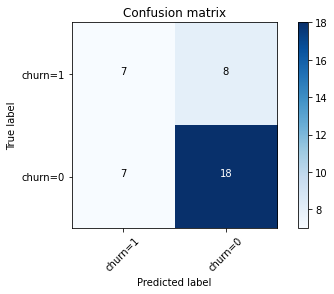

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [67]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71        25
         1.0       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [68]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6328239710889156

<h2 id="practice">Practice</h2>
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

In [69]:
# write your code here



Double-click __here__ for the solution.

<!-- Your answer is below:
    
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

-->

In [70]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
berneuli = BernoulliNB().fit(X_train, y_train)

In [72]:
print(classification_report(y_test, berneuli.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75        25
         1.0       0.58      0.47      0.52        15

    accuracy                           0.68        40
   macro avg       0.65      0.63      0.64        40
weighted avg       0.67      0.68      0.67        40



In [75]:
a = np.array([3, 4, 5])

In [76]:
a[0]/a.sum() * 100

25.0

Confusion matrix, without normalization
[[ 7  8]
 [ 5 20]]


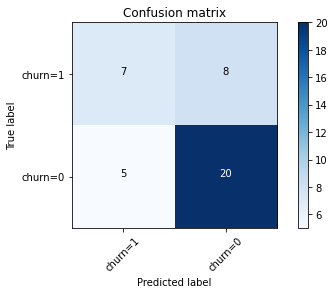

In [73]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, berneuli.predict(X_test), labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')